In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import copy
%matplotlib inline

---
# Part 1

set parameters

In [30]:
NX    = 10
NY    = 10
XMIN  = 0
XMAX  = 1
YMIN  = 0
YMAX  = 1
NITER = 50  # max number of iterations

Initialize the grids

In [3]:
u = np.zeros(shape=(NX,NY))

set initial conditions (assume 0 everywhere)

In [4]:
def initial(u,nx=NX,ny=NY):
    u[:,:] = 0
    return u

Boundary conditions

In [12]:
def set_boundary_conditions(u,nx=NX,ny=NY):
    """
    Input: u[i][j]
    
    Output: u[i][j]
    
    B.C.: top    (y=1): u = 1
          button (y=0): u = 0
          left   (x=0): u = 0
          right  (x=1): u = 0
    """

    # TODO: set the boundary conditions here
    for nx in range(1,NX-1):
        u[nx][NY-1]=1
    
    
    return u

## Jacobi method
Do one iteration

In [24]:
def evolve_jacobi(u,nx=NX,ny=NY):
    """
    do one Jacobi iteration
    
    Inputs: u[size of NX][size of NY]
    NX: number of points in x-axis
    NY: number of points in y-axis
    
    Outputs: u
    
    """
    
    uold = u.copy()
    #uold = copy.deepcopy(u)

    for i in range(1,NX-1):
        for j in range(1,NY-1):
            
            u[i][j] = (uold[i+1][j] + uold[i-1][j] + uold[i][j+1] + uold[i][j-1])/4
    
    return u

Check convergence by comparing the differecne between u1 and u2

In [7]:
def diff(u1,u2,nx=NX,ny=NY):
    error = 0.0
    for i in range(nx):
        for j in range(ny):
            error += abs(u1[i,j] - u2[i,j])
    return error

Start iterations

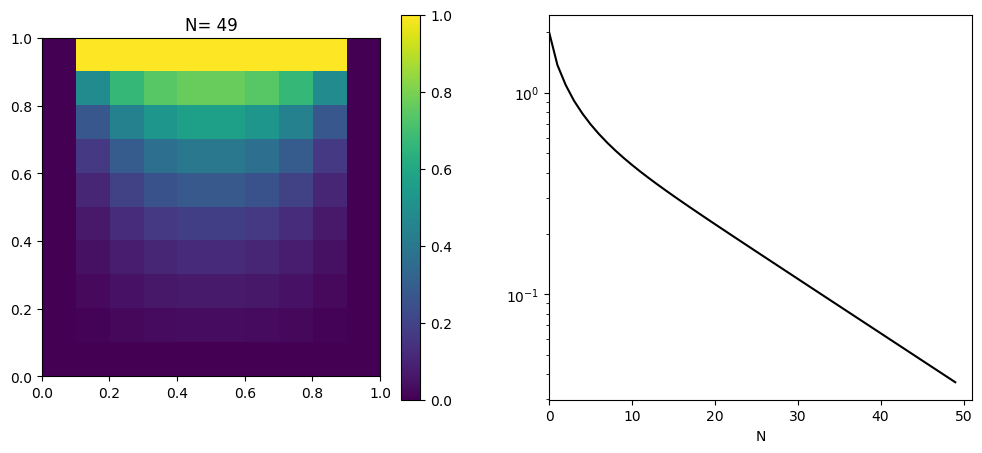

In [31]:
u = initial(u)
u = set_boundary_conditions(u)
errors = np.zeros(NITER)
for n in range(NITER):
    
    plt.figure(1,figsize=(12,5))
    plt.subplot(121)
    plt.title("N= {}".format(n))
    clear_output(wait=True)
    
    # make a copy of the u in the previous step
    
    #uold = copy.deepcopy(u)
    uold = u.copy()
    
    # do one iteration
    u = evolve_jacobi(u)
    
    #print(u)
    
    # check the difference
    err = diff(uold,u)
    errors[n] = err
    
    # plot the results
    plt.imshow(u.T,origin='lower',extent=[XMIN,XMAX,YMIN,YMAX],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.plot(errors,'k-')
    plt.xlim([0,NITER+1])
    plt.xlabel("N")
    plt.yscale('log')
    #time.sleep(0.0001)
    plt.show()

---
# Part 2

## Gauss-Seidel method

In [34]:
def evolve_gauss_seidel(u,nx=NX,ny=NY):
    
    """
    do one Gauss-Seidel iteration
    """
    
    #uold = u.copy()
    #uold = copy.deepcopy(u)

    for i in range(1,NX-1):
        for j in range(1,NY-1):
            
            u[i][j] = (u[i+1][j] + u[i-1][j] + u[i][j+1] + u[i][j-1])/4
    
    
    return u

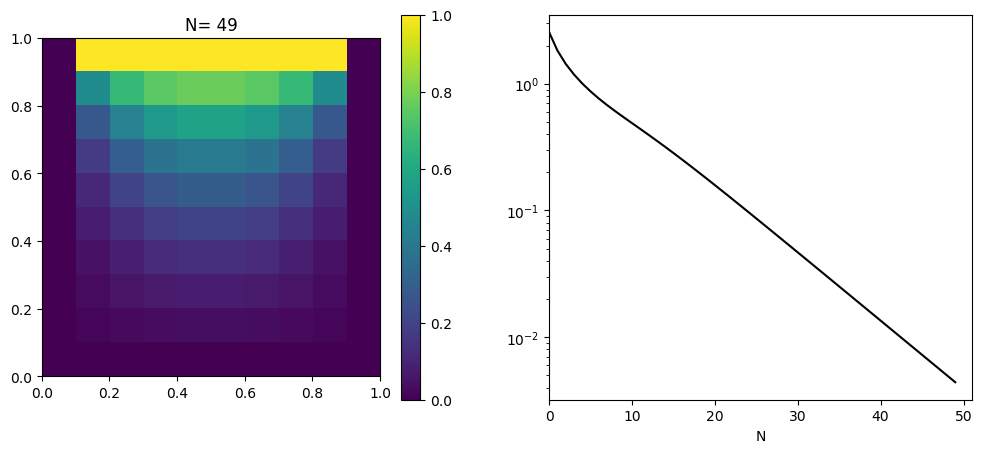

In [35]:
#TODO: Visualize the results here

u = initial(u)
u = set_boundary_conditions(u)
errors = np.zeros(NITER)
for n in range(NITER):
    
    plt.figure(1,figsize=(12,5))
    plt.subplot(121)
    plt.title("N= {}".format(n))
    clear_output(wait=True)
    
    # make a copy of the u in the previous step
    
    #uold = copy.deepcopy(u)
    uold = u.copy()
    
    # do one iteration
    u = evolve_gauss_seidel(u)
    
    #print(u)
    
    # check the difference
    err = diff(uold,u)
    errors[n] = err
    
    # plot the results
    plt.imshow(u.T,origin='lower',extent=[XMIN,XMAX,YMIN,YMAX],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.plot(errors,'k-')
    plt.xlim([0,NITER+1])
    plt.xlabel("N")
    plt.yscale('log')
    #time.sleep(0.0001)
    plt.show()

---
# Part 3

## Successive over-relax method:

w < 1 : under-relaxation
w = 1 : Gauss-Seidel method
w > 1 : over-relaxation

In [36]:
def evolve_SOR(u,nx=NX,ny=NY):
       
    uold = u.copy()
    #uold = copy.deepcopy(u)

    w = 1.2
    
    uu = evolve_gauss_seidel(u)
    
    
    
    for i in range(1,NX-1):
        for j in range(1,NY-1):
            
            u[i][j] = (1-w)*uold[i][j] + w*uu[i][j]
    
    
    return u

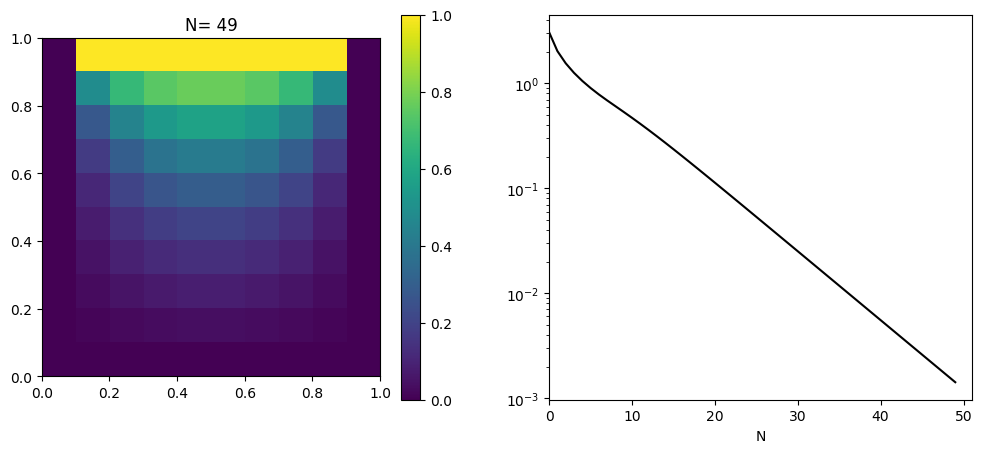

In [37]:
#TODO: Visualize the results here

u = initial(u)
u = set_boundary_conditions(u)
errors = np.zeros(NITER)
for n in range(NITER):
    
    plt.figure(1,figsize=(12,5))
    plt.subplot(121)
    plt.title("N= {}".format(n))
    clear_output(wait=True)
    
    # make a copy of the u in the previous step
    
    #uold = copy.deepcopy(u)
    uold = u.copy()
  
    # do SOR method
    
    u = evolve_SOR(u)
    
    # check the difference
    err = diff(uold,u)
    errors[n] = err
    
    # plot the results
    plt.imshow(u.T,origin='lower',extent=[XMIN,XMAX,YMIN,YMAX],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.plot(errors,'k-')
    plt.xlim([0,NITER+1])
    plt.xlabel("N")
    plt.yscale('log')
    #time.sleep(0.0001)
    plt.show()